In [1]:
%reset -f
from libraries_FIELDS import * 

Current Time = 19:47:09


In [7]:
pickle_dir = './pickle_files'
pickled_files = list(sorted(Path(pickle_dir).rglob('*.pickle')))
colorplate = plt.cm.get_cmap('viridis', len(pickled_files))
pickled_files, len(pickled_files)

([PosixPath('pickle_files/Shout_meas_01-30-2023_15-40-55_1685303873.pickle'),
  PosixPath('pickle_files/Shout_meas_01-30-2023_17-47-39_1685303959.pickle'),
  PosixPath('pickle_files/Shout_meas_01-30-2023_19-53-09_1685304016.pickle'),
  PosixPath('pickle_files/Shout_meas_01-30-2023_20-33-48_1685304045.pickle'),
  PosixPath('pickle_files/Shout_meas_01-30-2023_21-29-33_1685304075.pickle'),
  PosixPath('pickle_files/Shout_meas_02-03-2023_10-39-20_1685233633.pickle'),
  PosixPath('pickle_files/Shout_meas_02-03-2023_12-55-47_1685233854.pickle'),
  PosixPath('pickle_files/Shout_meas_02-06-2023_14-29-39_1685304776.pickle'),
  PosixPath('pickle_files/Shout_meas_02-09-2023_13-05-31_1685305111.pickle'),
  PosixPath('pickle_files/Shout_meas_02-09-2023_15-08-10_1685305816.pickle'),
  PosixPath('pickle_files/Shout_meas_02-14-2023_08-37-53_1685301758.pickle'),
  PosixPath('pickle_files/Shout_meas_02-14-2023_10-45-17_1685301844.pickle'),
  PosixPath('pickle_files/Shout_meas_02-14-2023_12-48-02_1685301

01-30-2023_15-40-55


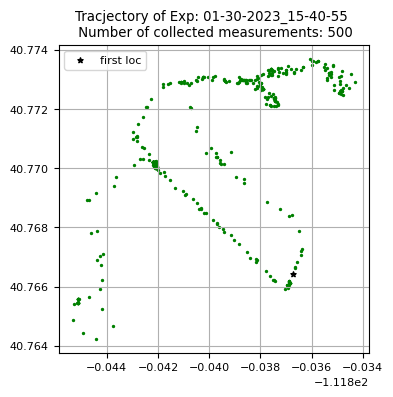

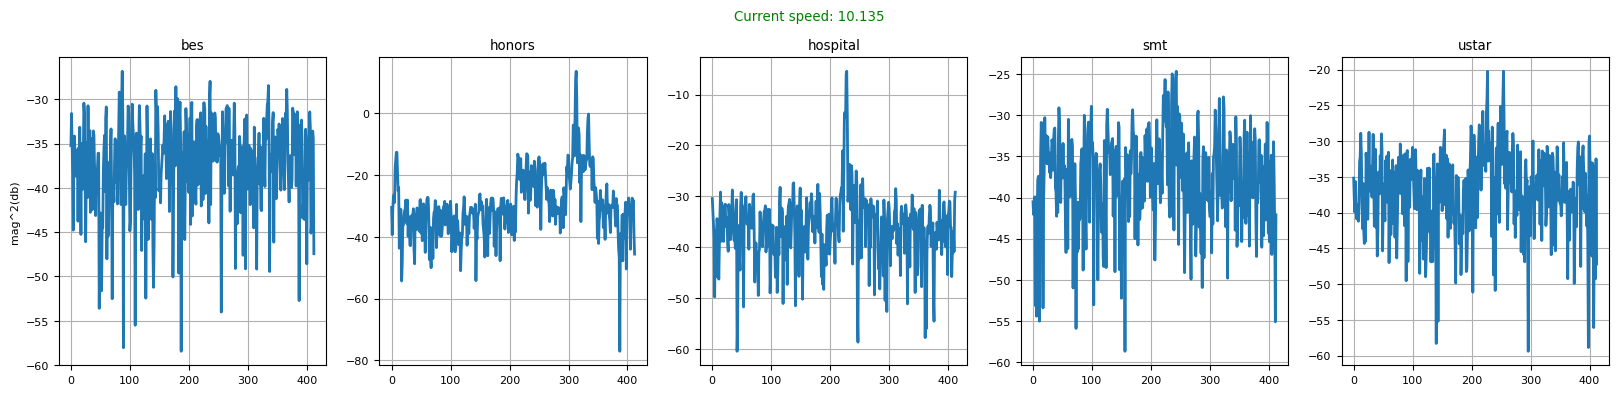

breaking after showing only the 1st sample for each experiment!


01-30-2023_17-47-39


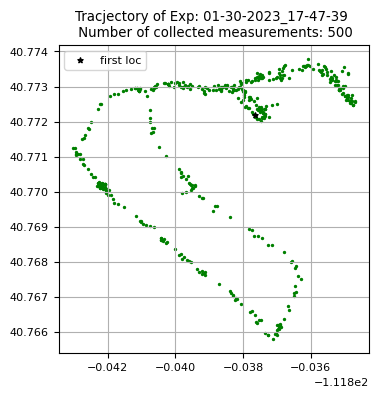

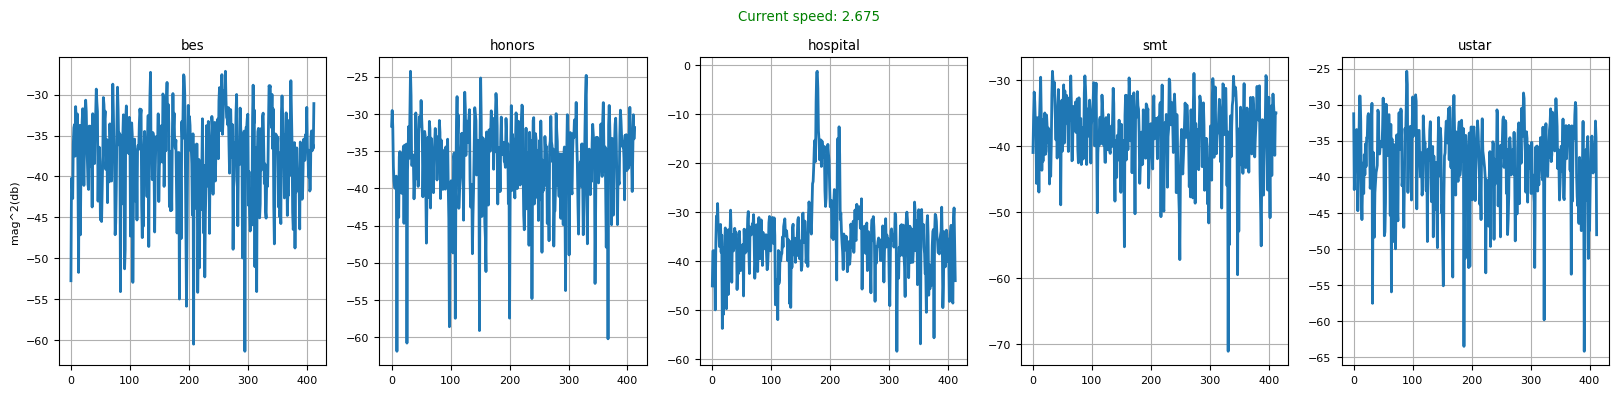

breaking after showing only the 1st sample for each experiment!


01-30-2023_19-53-09


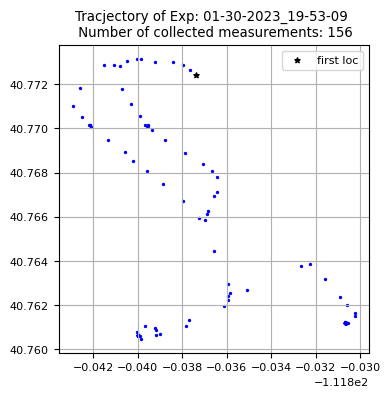

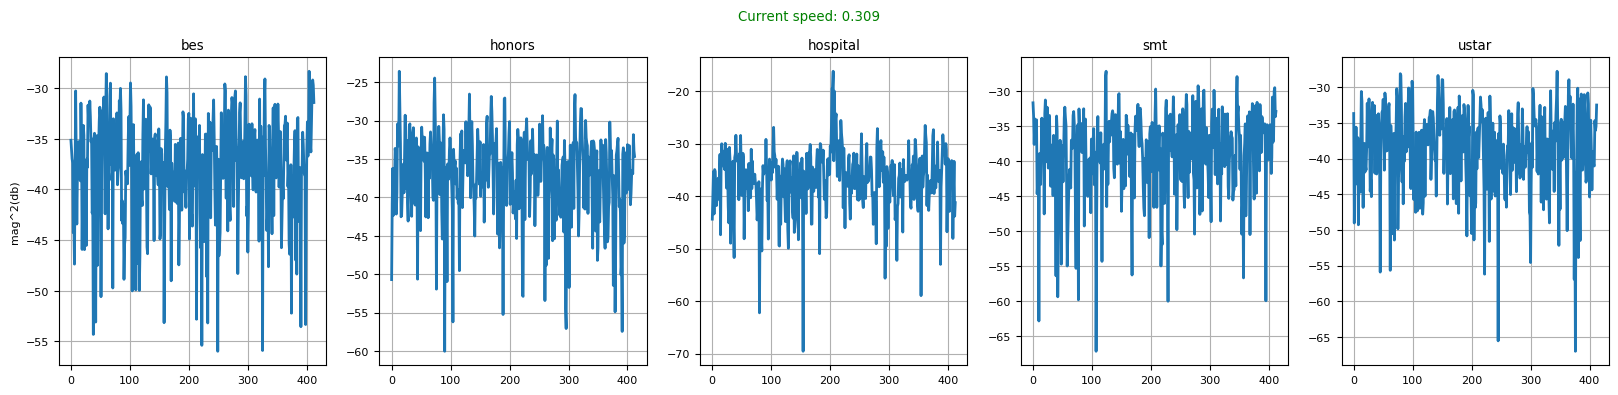

breaking after showing only the 1st sample for each experiment!


01-30-2023_20-33-48


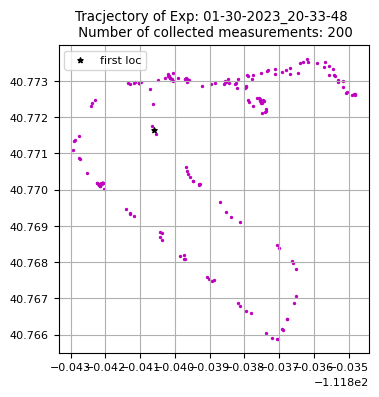

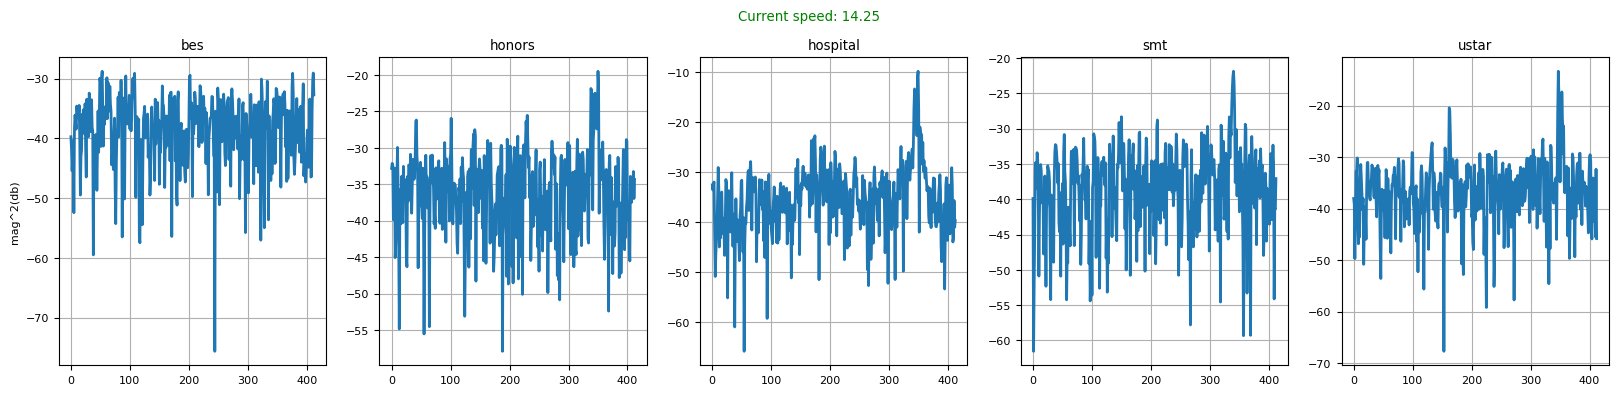

breaking after showing only the 1st sample for each experiment!


01-30-2023_21-29-33


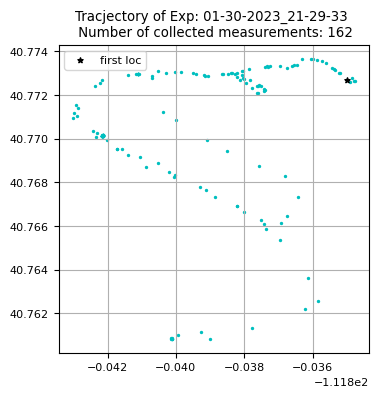

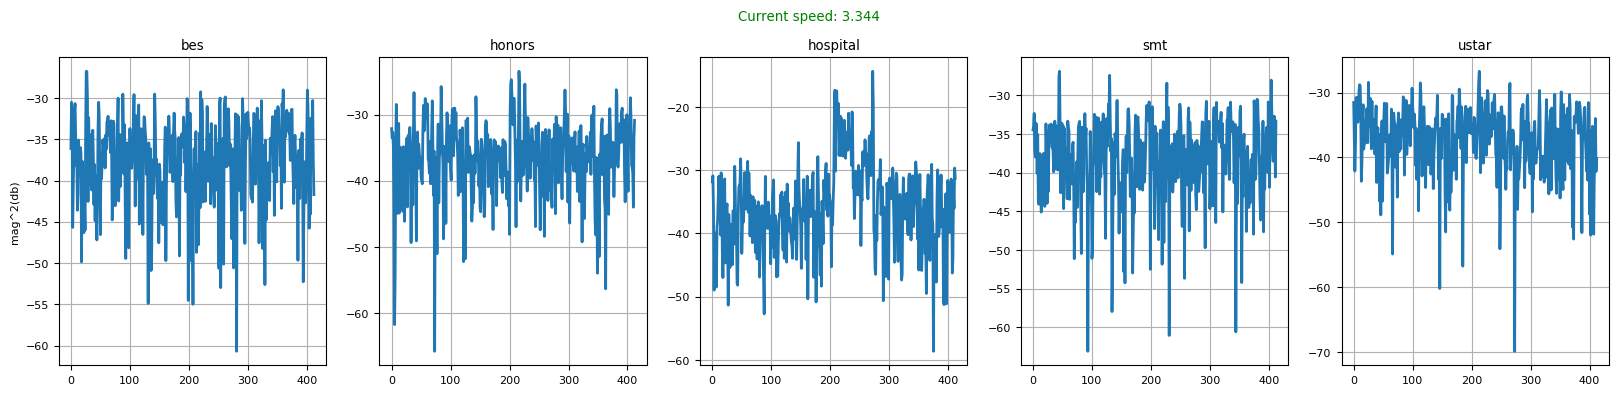

breaking after showing only the 1st sample for each experiment!


02-03-2023_10-39-20


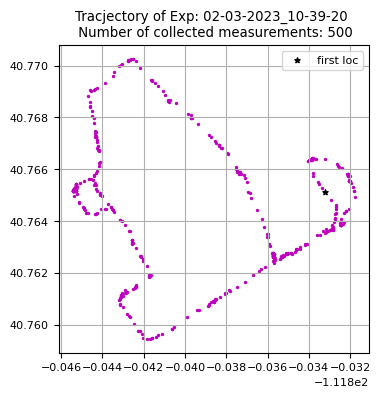

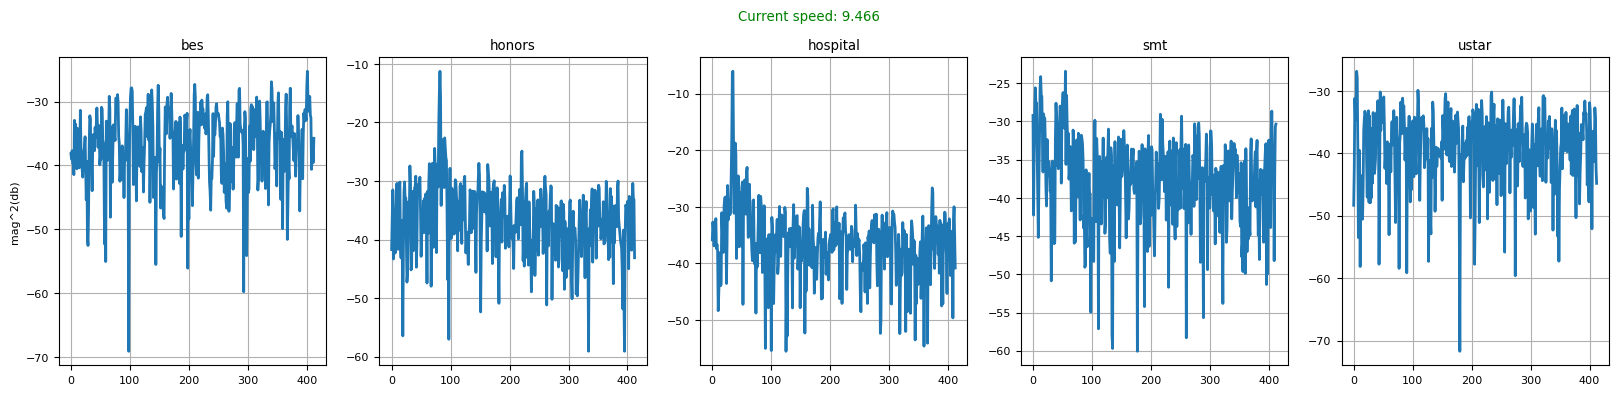

breaking after showing only the 1st sample for each experiment!


02-03-2023_12-55-47


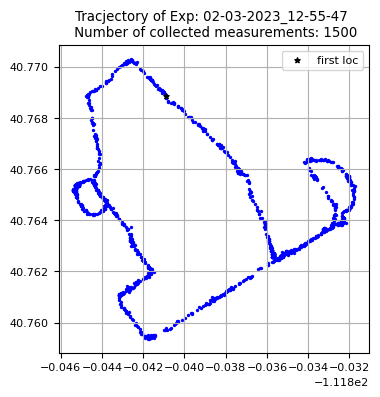

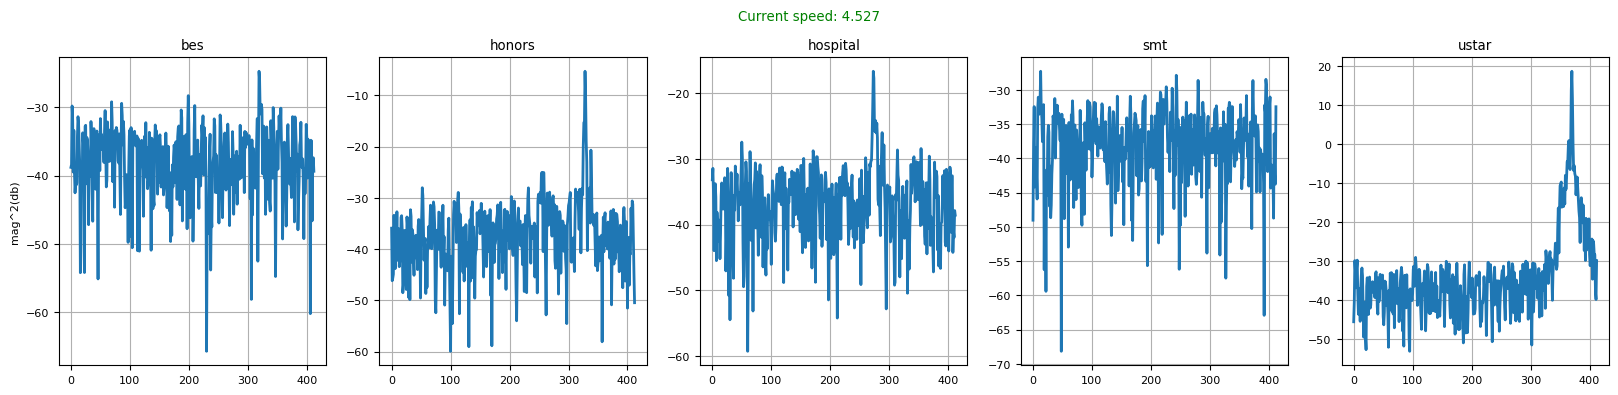

breaking after showing only the 1st sample for each experiment!


02-06-2023_14-29-39


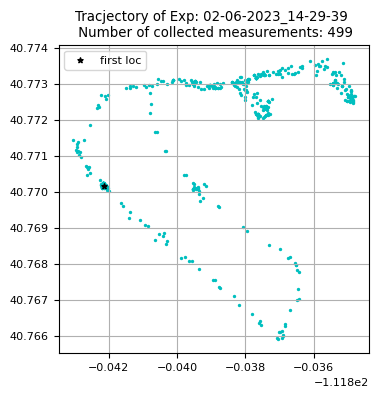

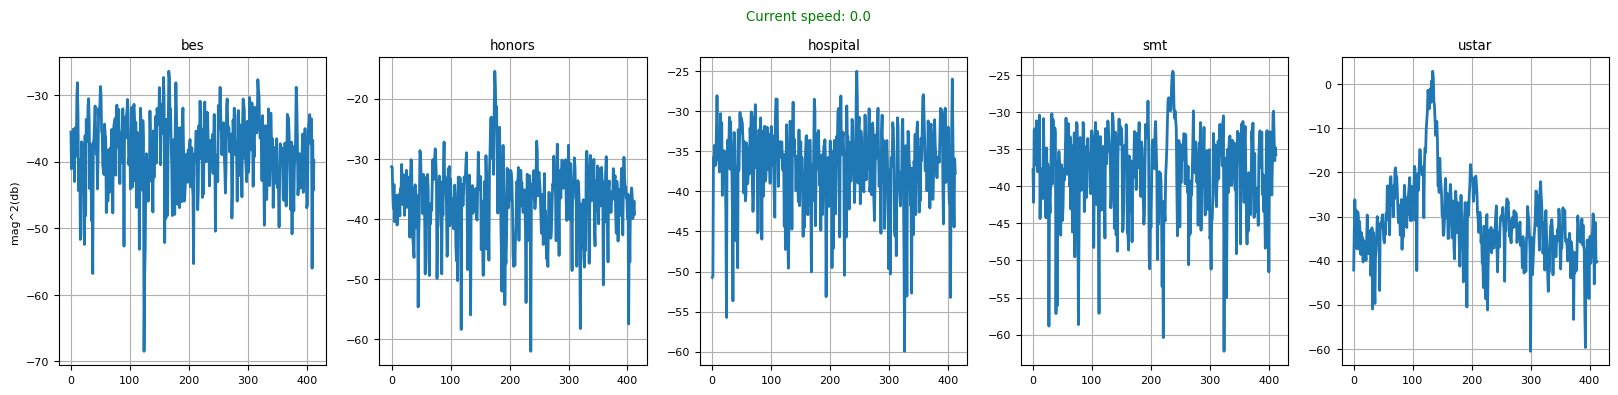

breaking after showing only the 1st sample for each experiment!


02-09-2023_13-05-31


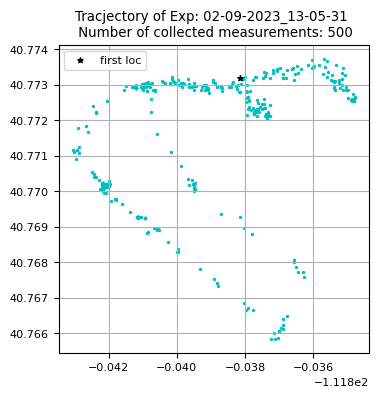

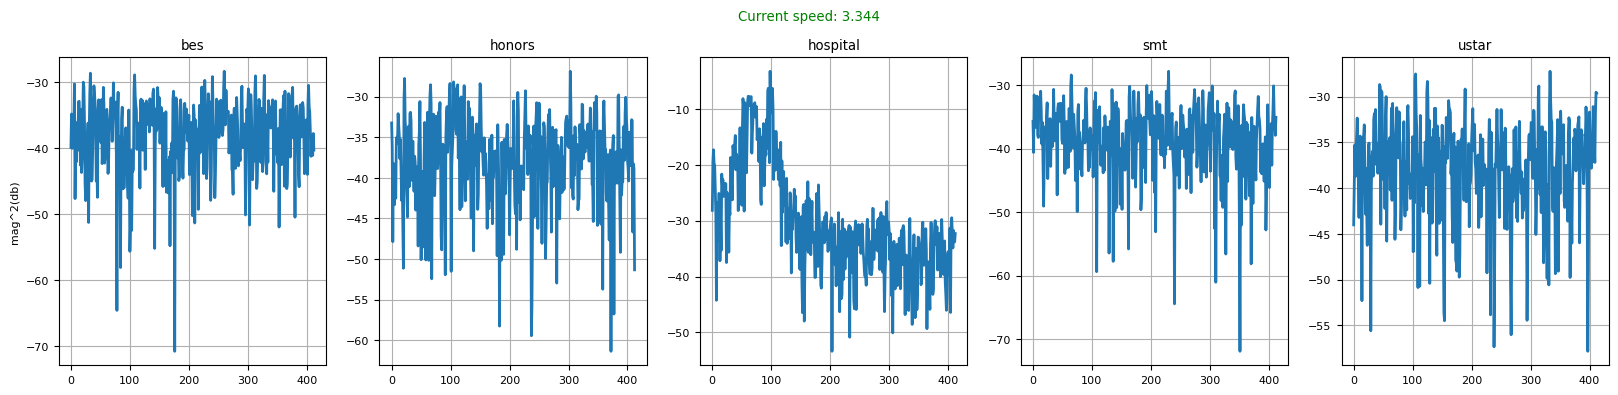

breaking after showing only the 1st sample for each experiment!


02-09-2023_15-08-10


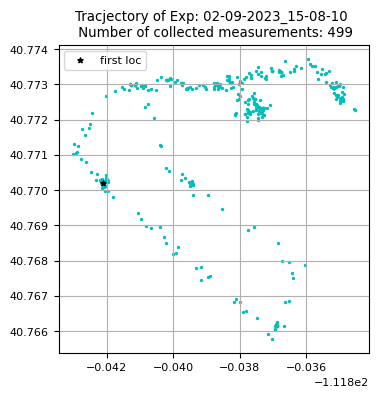

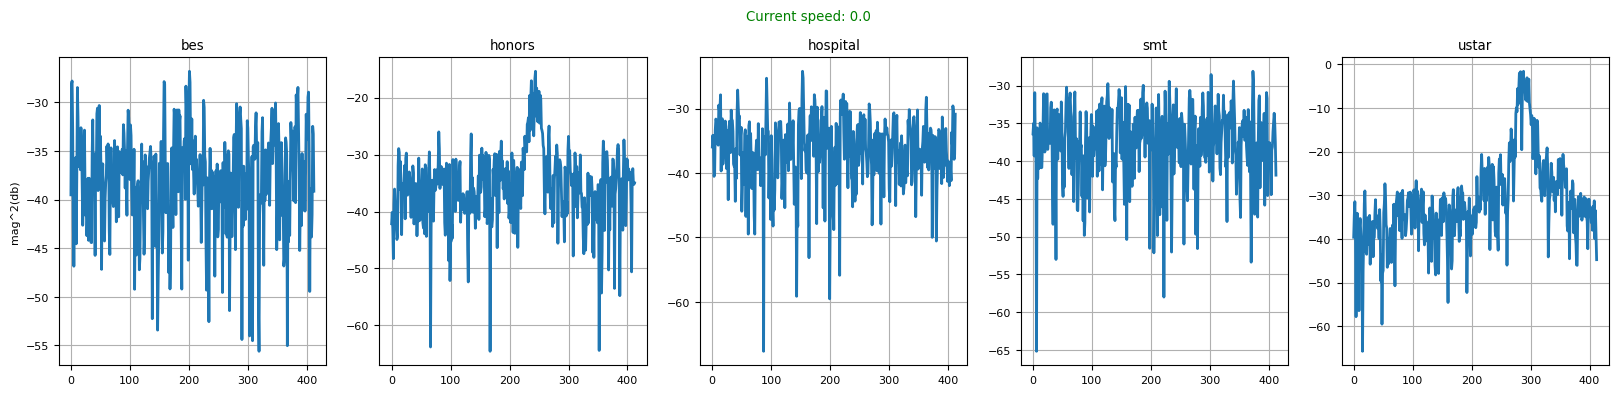

breaking after showing only the 1st sample for each experiment!


02-14-2023_08-37-53


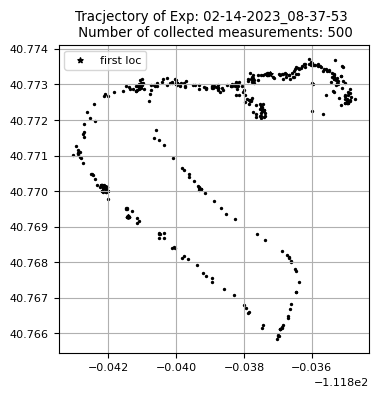

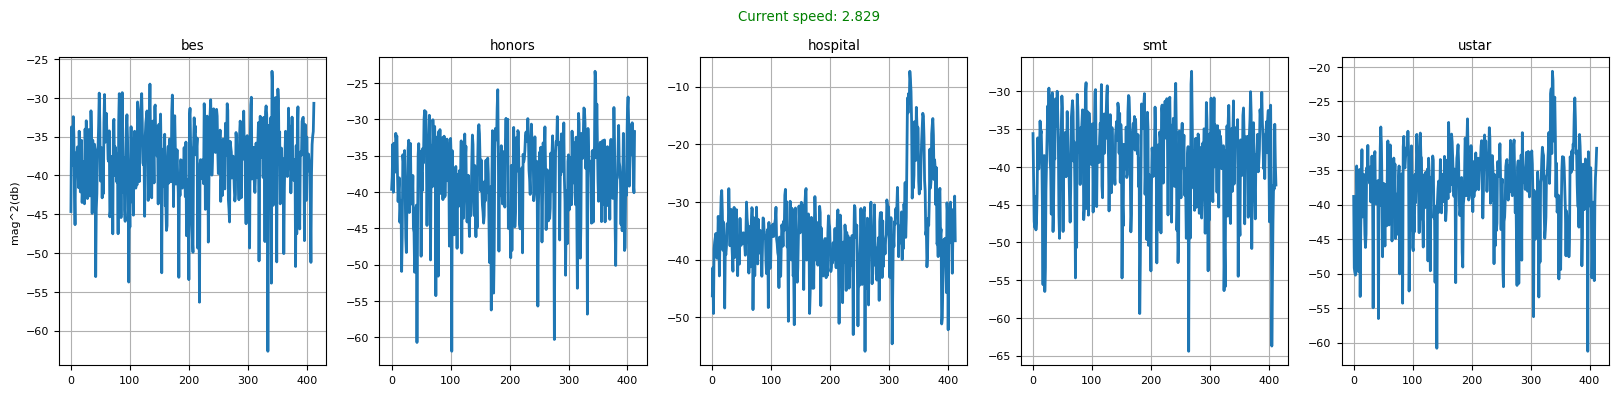

breaking after showing only the 1st sample for each experiment!


02-14-2023_10-45-17


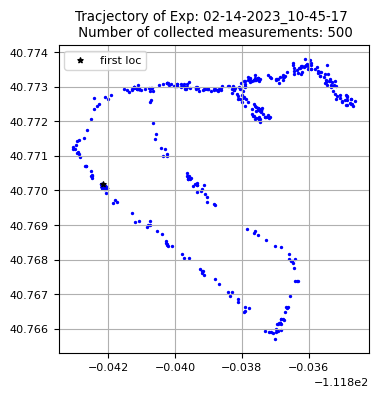

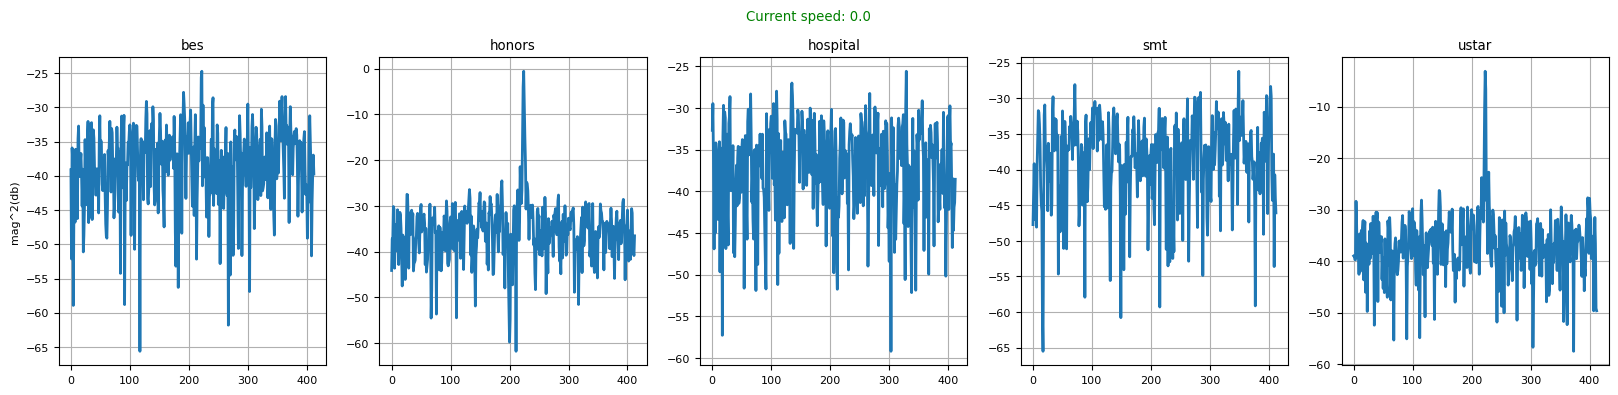

breaking after showing only the 1st sample for each experiment!


02-14-2023_12-48-02


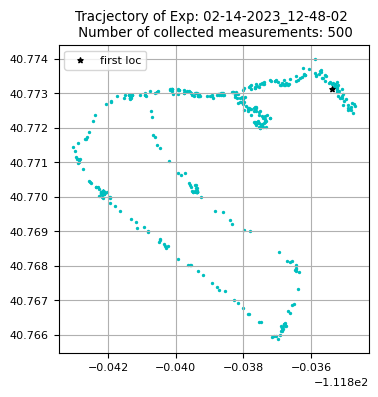

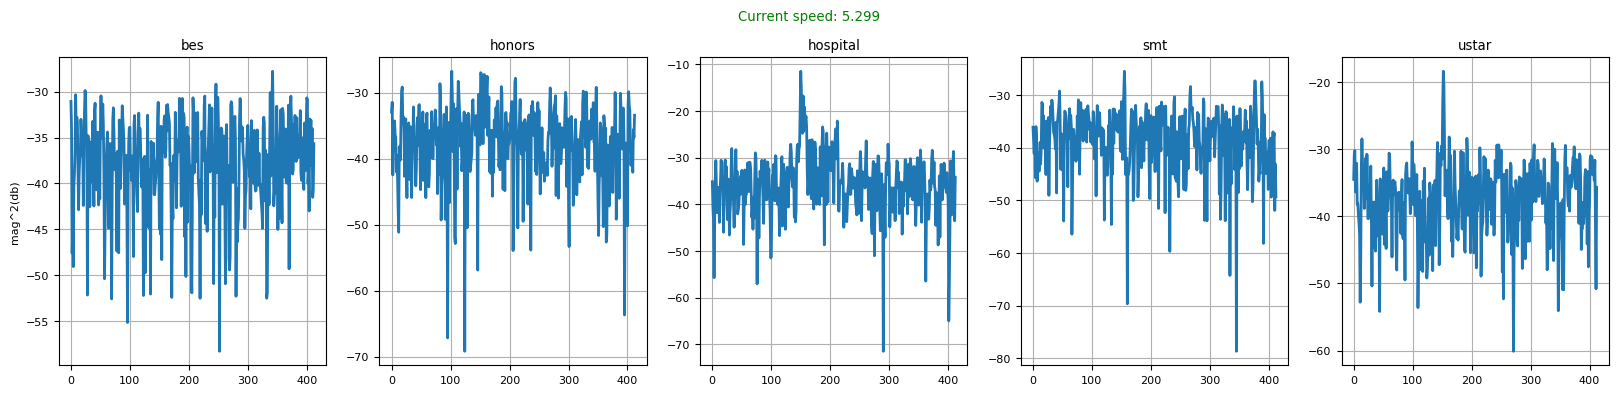

breaking after showing only the 1st sample for each experiment!


02-14-2023_16-57-55


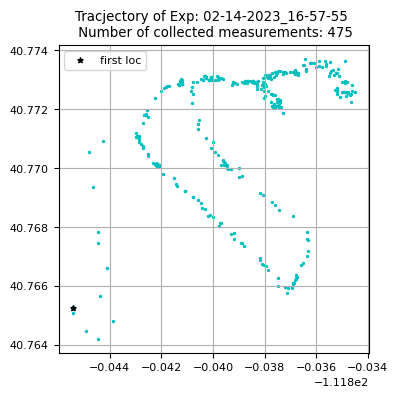

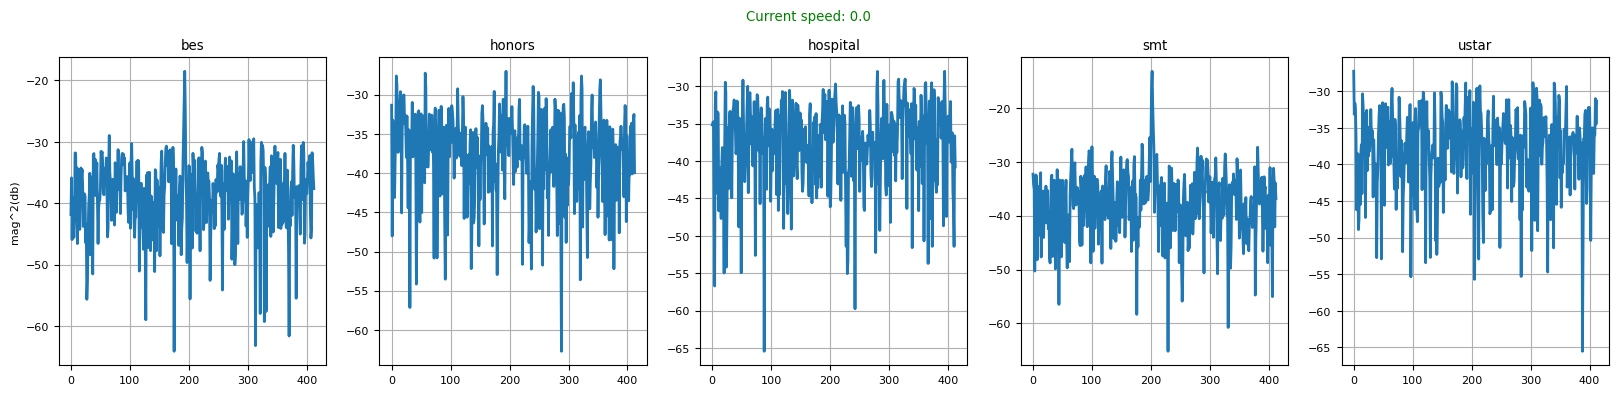

breaking after showing only the 1st sample for each experiment!


02-14-2023_18-53-20


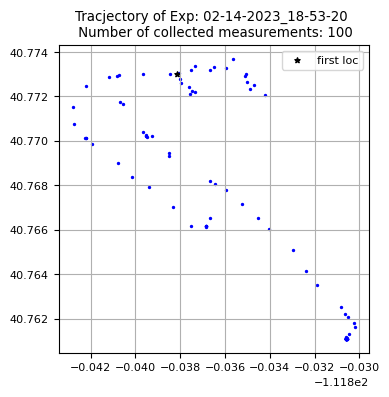

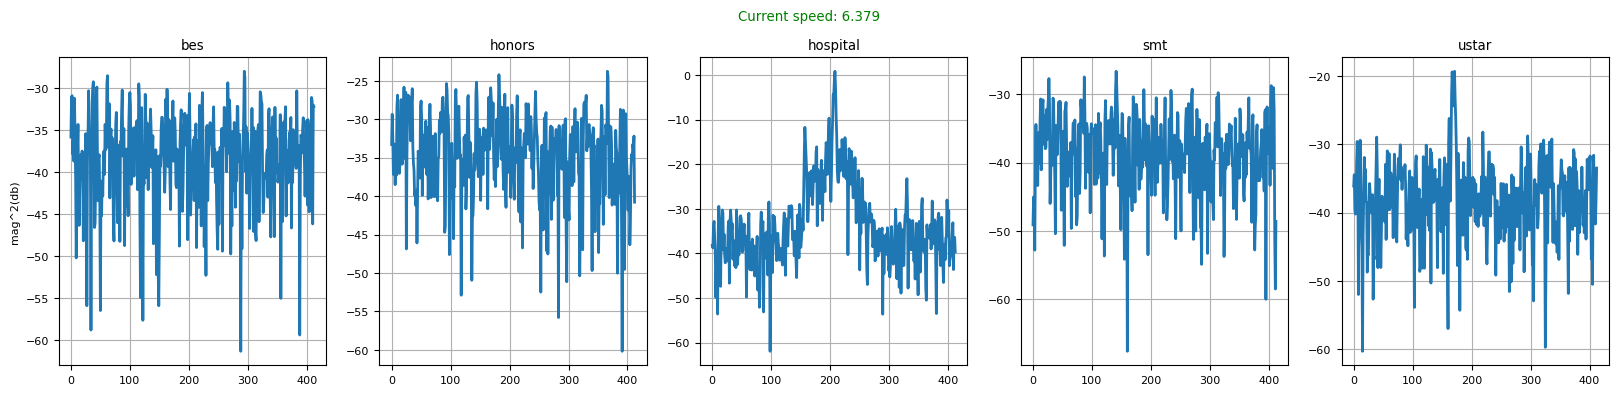

breaking after showing only the 1st sample for each experiment!


02-16-2023_10-04-45


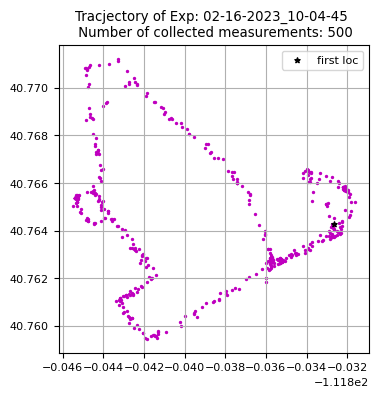

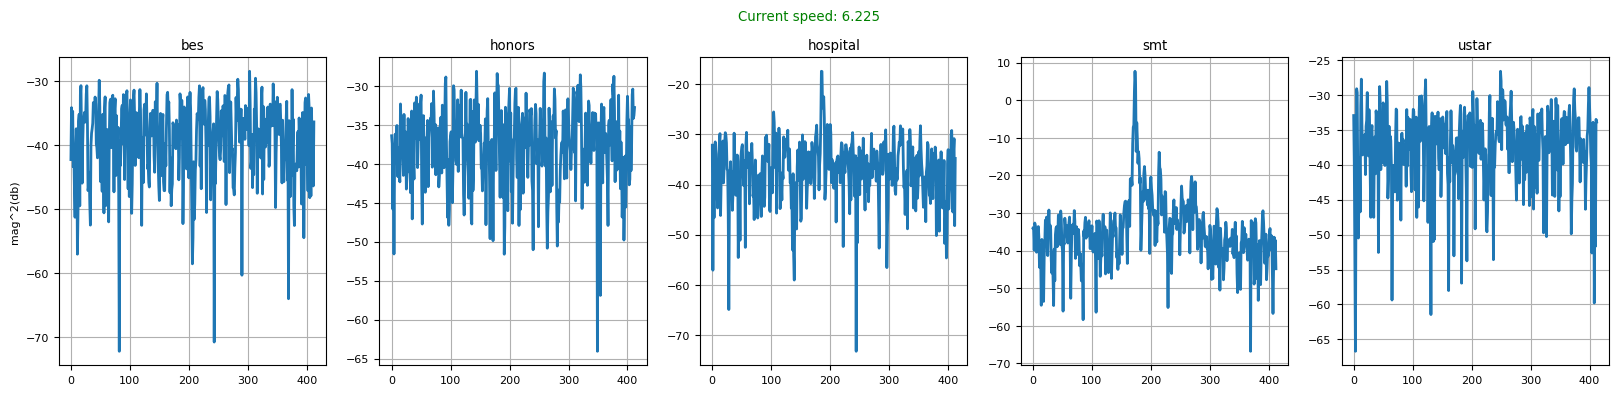

breaking after showing only the 1st sample for each experiment!


02-16-2023_12-23-48


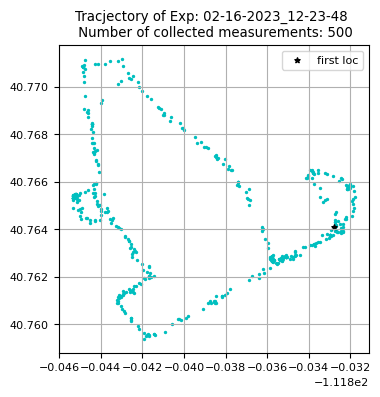

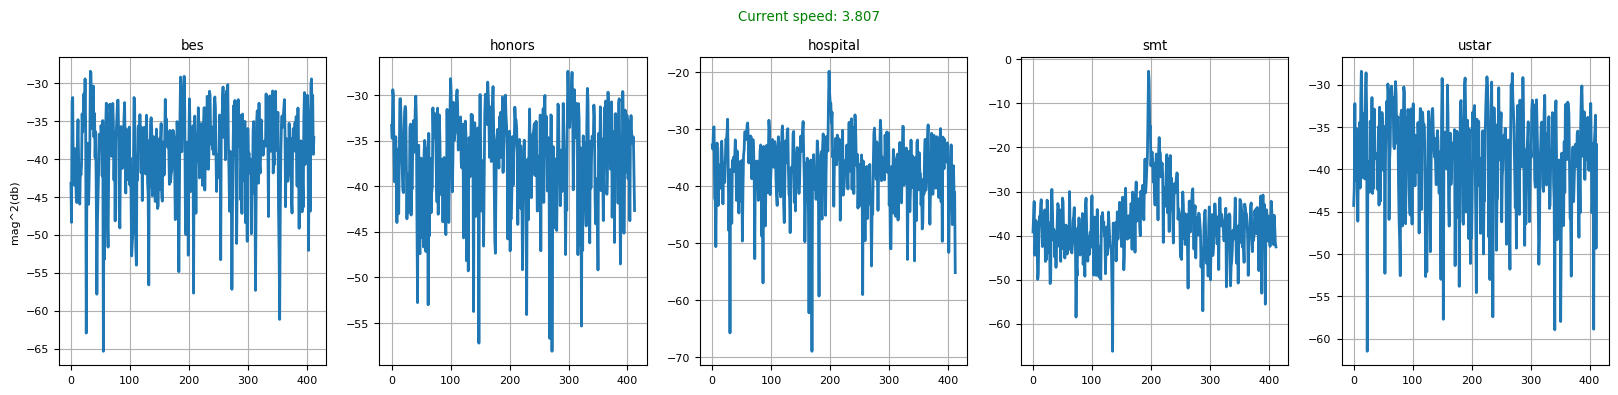

breaking after showing only the 1st sample for each experiment!


02-16-2023_14-55-52


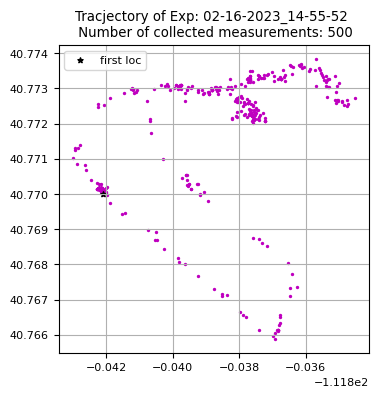

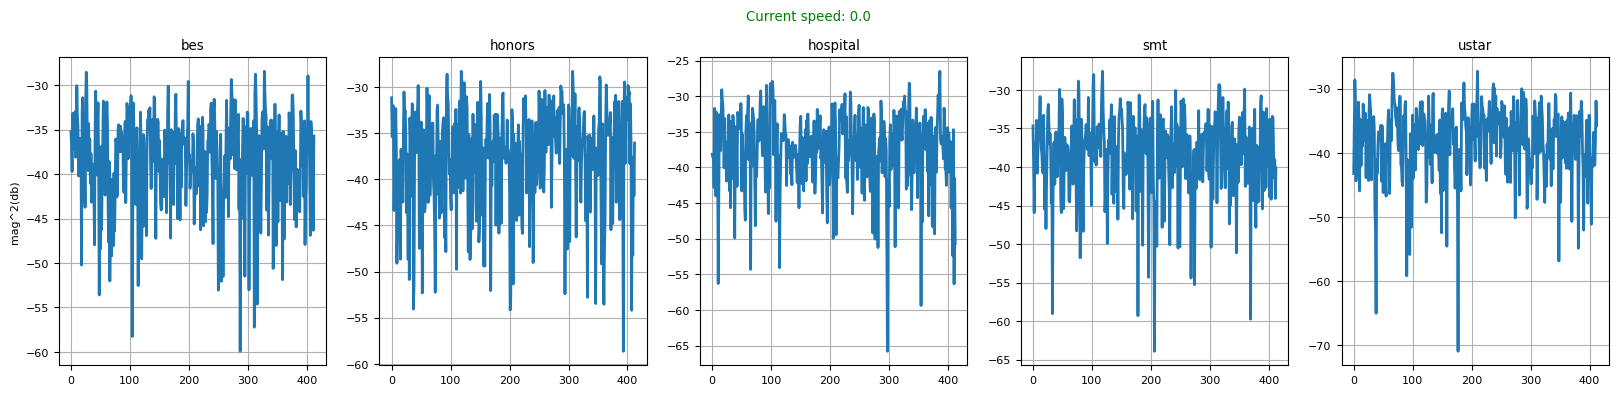

breaking after showing only the 1st sample for each experiment!


02-16-2023_16-59-03


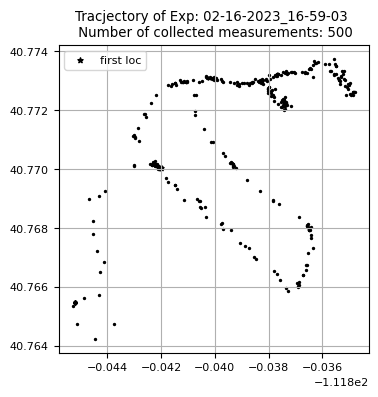

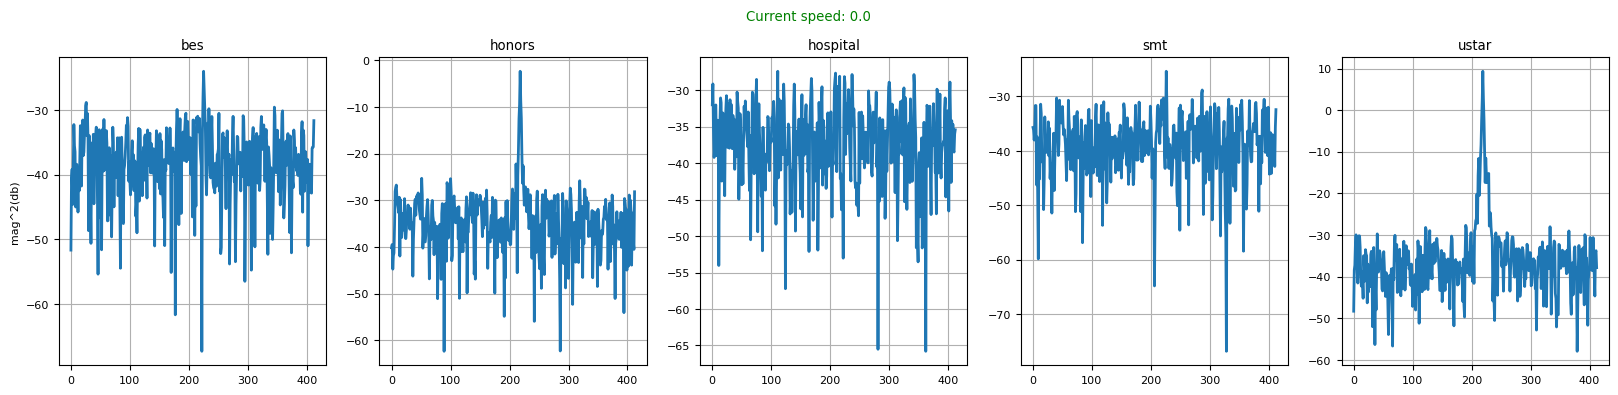

breaking after showing only the 1st sample for each experiment!


02-16-2023_19-01-43


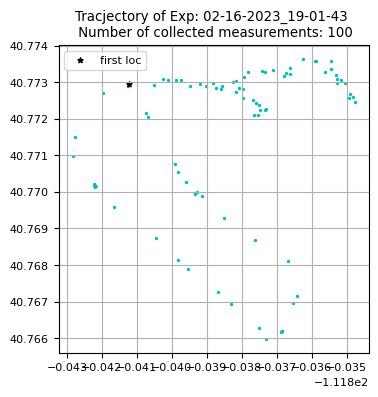

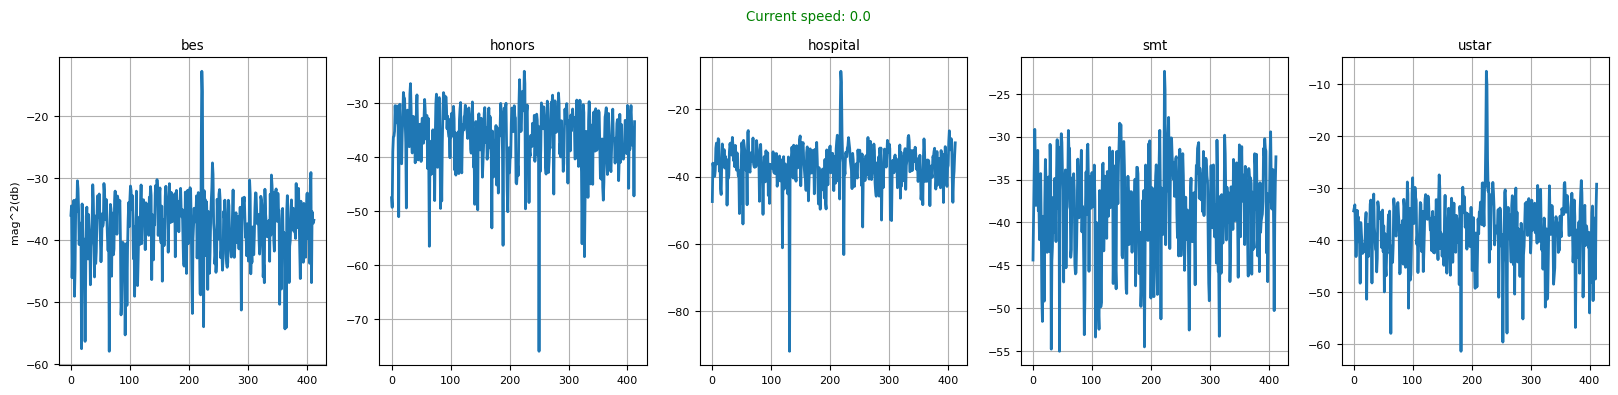

breaking after showing only the 1st sample for each experiment!


02-16-2023_19-40-05


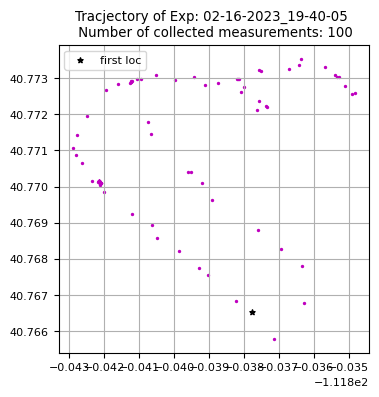

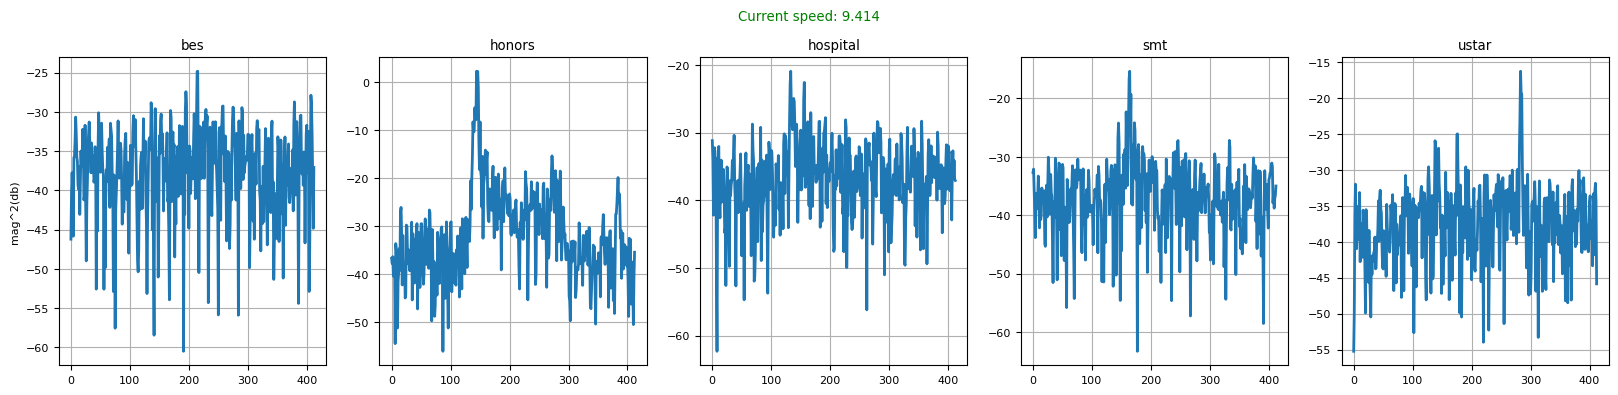

breaking after showing only the 1st sample for each experiment!


 Full dataframe stacked all experiments ====> 
 9291


In [17]:
full_data_df = pd.DataFrame()
cforeacheachile = ['r','b','g','k','c','m'] 

for i, filename in enumerate(pickled_files):

    
    fn = '_'.join(str(filename).split('_')[3:5])
    print(fn)
    loaded_dicts = pkl.load(open(filename, 'rb') )
    
    ## Metadata of each experiment
    this_exp_metadata = loaded_dicts[1]
    timstampofExpMT = datetime.datetime.strptime(this_exp_metadata['exp_datetime'], "%Y-%m-%d %H:%M:%S").astimezone( pytz.timezone("America/Denver"))
    this_exp_metadata['exp_datetime'] = timstampofExpMT
    
    ## Data for each experiment
    this_exp_data = loaded_dicts[0]
    
   ## Plot the traversed route
    fig_ori, ax_ori = plt.subplots()
    y_utmlat = pd.DataFrame(this_exp_data)['position_lat']
    y_utmlon = pd.DataFrame(this_exp_data)['position_lon']
    j = np.random.randint(0,6)    
    for ii in range(len(y_utmlat)):
        
        xx = y_utmlon.iloc[ii] 
        yy = y_utmlat.iloc[ii] 
        
        ax_ori.scatter(xx, yy, c=cforeacheachile[j], marker='o', s=2)
    
    ax_ori.scatter( y_utmlon.iloc[0], y_utmlat.iloc[0] , marker='*', s=15, label = 'first loc', c = 'k')
    ax_ori.legend()
    ax_ori.grid(True)
    plt.title(f"Tracjectory of Exp: {fn} \n Number of collected measurements: {len(y_utmlat)}") 
    plt.show()
    
    
    ## Plot PSD
    df = pd.DataFrame(this_exp_data)
    for r in range(len(df)):
        this_speed = df['gpsspeed'].iloc[r]
        
        fig, axx = plt.subplots(1, 5, figsize=(20, 4), num="narrowspectrum", sharey= False) 
        axx[0].set_ylabel('mag^2(db)')
  
        for p in range(0,5):
            this_bs = df.columns.values[p].split('-')[1]
            
            pxxc_ns_DB = np.nan_to_num(10.0 * np.log10(np.square(np.abs(df.iloc[r,p])) ))
            phase_ns   = np.angle(df.iloc[r,p])
            
            axx[p].plot(pxxc_ns_DB) # axx[p].plot(phase_ns)
            
            axx[p].set_title(f"{this_bs}")
            axx[p].grid(True)
                             
        plt.figure("narrowspectrum").suptitle( f"Current speed: {this_speed}", y= 1, color = 'g')
        plt.show()
        plt.pause(1)
        print("breaking after showing only the 1st sample for each experiment!\n\n")
        break
            
    ## Append now!
    full_data_df = pd.concat([full_data_df, pd.DataFrame(this_exp_data)])

print(" Full dataframe stacked all experiments ====> \n", len(full_data_df))    


In [18]:
full_data_df

,cbrssdr1-bes-comp,cbrssdr1-honors-comp,cbrssdr1-hospital-comp,cbrssdr1-smt-comp,cbrssdr1-ustar-comp,position_lat,position_lon,gpsspeed,gpstrack,dt_time
0,"[(0.006170498613575413-0.016140867799797298j),...","[(9.094195746835133e-05+0.03001774735612677j),...",[(-0.026602223329523497+0.014009305316164506j)...,"[(0.007086892193842777+0.006216787588987198j),...",[(-0.017406060460840412-0.0004953364173547099j...,40.766430,-111.836711,10.135,198.6,2023-01-30 15:41:36
1,"[(0.007047853272819625+0.00878635332001285j), ...",[(-0.013136466538687979+0.0005280522151166418j...,"[(-0.02580184296879489-0.014606113826864829j),...",[(-0.019783096946575776+0.006729079729594346j)...,[(-0.004632745226752473+0.006993628345059809j)...,40.766136,-111.836832,0.566,194.7,2023-01-30 15:41:50
2,[(-0.002989163195635052-0.016148057584013307j)...,"[(0.020881388513135493+0.001583133619542311j),...","[(-0.00701889456064207+0.019276347369874137j),...","[(-0.0030988954944357+0.0001818800178723975j),...","[(0.009755434307580257+0.007951681673169675j),...",40.766126,-111.836846,0.000,194.7,2023-01-30 15:42:06
3,"[(0.012441305504457559-0.01444747502494122j), ...",[(-0.014287709339697453-0.018224788245720134j)...,[(-0.0035464610508973535+0.0017299004329938803...,"[(0.00434316044558879+0.009951575439779828j), ...","[(0.002977299167002582-0.015597422835333389j),...",40.766126,-111.836842,0.000,194.7,2023-01-30 15:42:22
4,[(-0.012881162527542036+0.0027542316586373853j...,"[(0.007178929167724835-0.011366135864633736j),...",[(0.007555851226487232-0.0029947663723016195j)...,"[(0.01858184900734991-0.008901767728040307j), ...",[(-0.0006466704208856695-0.012786914194146206j...,40.766127,-111.836840,0.000,194.7,2023-01-30 15:42:38
...,...,...,...,...,...,...,...,...,...,...
95,"[(0.014768427145251117-0.019284437473772263j),...",[(0.00018370062531199865-0.010956544869873932j...,"[(0.010795092865948323+0.022447967298633444j),...",[(-0.005641150111444739-0.020420229229562867j)...,"[(0.013041789694159145+0.008176220611012234j),...",40.771441,-111.840648,13.015,171.1,2023-02-16 20:03:43
96,[(-0.004291092945754294-0.0016941187798984996j...,"[(0.02202502174962394+0.012626152562375268j), ...","[(0.002693589031507428+0.01415074766214019j), ...","[(0.016048101977532238-0.007322868074867549j),...",[(-0.0056164231642580435-0.008037285036766189j...,40.770409,-111.839516,3.601,141.0,2023-02-16 20:03:56
97,[(-0.0007720754482570963-0.00928798213358812j)...,"[(0.012463274893578591+0.004287092768376086j),...",[(0.00040983377584194675-0.03303176156077753j)...,"[(0.007604215022606801+0.003973699883113787j),...",[(0.0015251379863893968-0.013381322749416637j)...,40.770101,-111.839200,10.083,141.0,2023-02-16 20:04:09
98,"[(0.00509265172026214+0.009986489702835517j), ...","[(-0.01568392588116442+0.004154292641109595j),...","[(0.02410096537764398+0.021692736603283545j), ...",[(0.0039424147291760425+0.011737503047114996j)...,[(-0.008328201289867193-0.0036200868192445865j...,40.768791,-111.837593,14.713,129.1,2023-02-16 20:04:24
